## Seabornを使ってスマートにグラフを書く

* わかったこと: **Jupyterにおける日本語表示は闇**
* やったこと: .ipython以下にipython_kernel_config.pyを作成し，

```
c.InlineBackend.rc = {
    'font.size': 11,
    'font.family': 'Osaka',
    'figure.figsize': (6.0, 4.0),
    'savefig.dpi': 80,
    'axes.titlesize': 12
}

c.InlineBackend.figure_formats = set(['png', 'retina'])
```

をコピペ

参考資料: http://qiita.com/hagino3000/items/1b54acc01483ccd0ac72

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib
from q36 import count_terms
import sys
%matplotlib inline

## q37

In [28]:
d = count_terms(open("./data/neko.txt.mecab"))
df = pd.DataFrame(d.items(), columns=["Term", "Frequency"]).sort_values(by=["Frequency"], ascending=False)

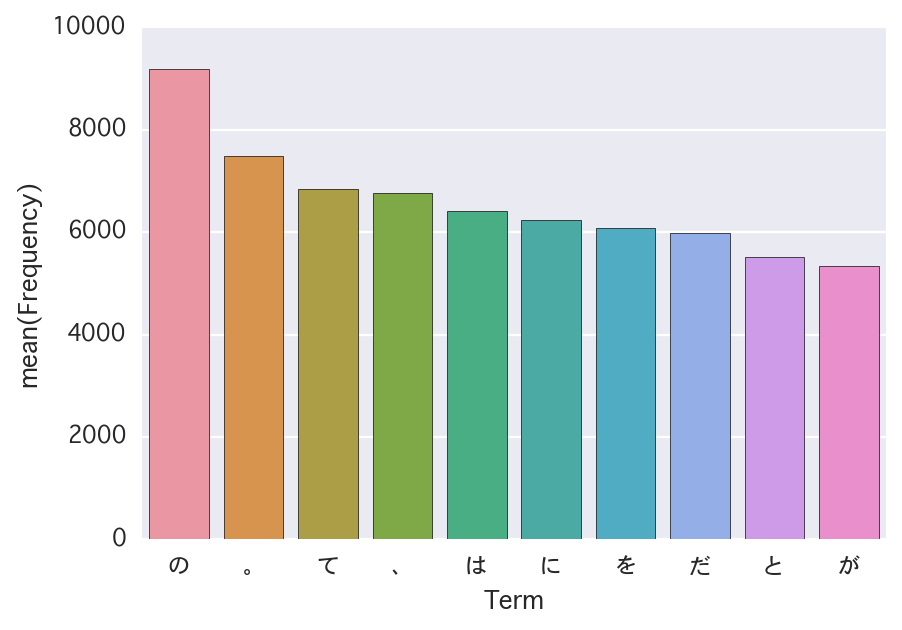

In [30]:
sns.barplot("Term", "Frequency", data=df.head(10))

無事にスマートなグラフが作成された

# q38

単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

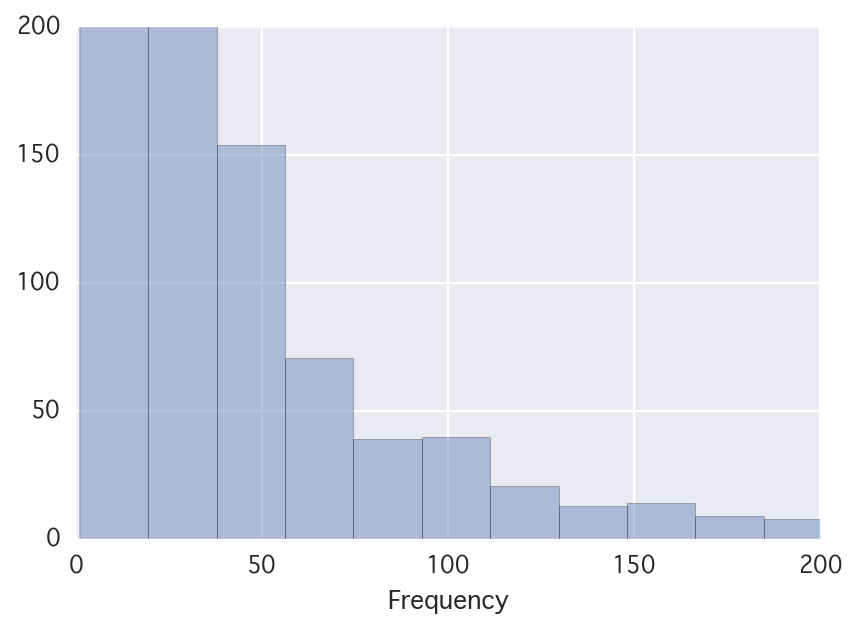

In [54]:
hist = sns.distplot(df.Frequency,kde=False, bins=500)
hist.set(ylim=(0, 200)) #値を制限しないと見切れる
hist.set(xlim=(0, 200))
hist

# q39

単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

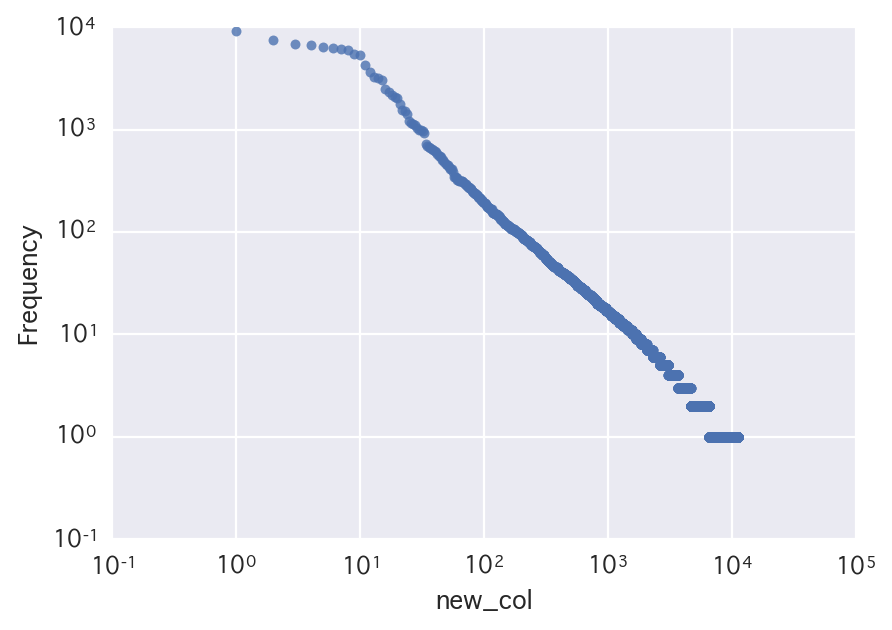

In [89]:
df['new_col'] = range(1,len(df) + 1)
f, ax = plt.subplots()
ax.set(xscale='log', yscale='log')
sns.regplot(x="new_col", y="Frequency",ax=ax, data=df, fit_reg = False)

もっとスマートなやり方があるはず…